1. Display and visualize male students count and female students count

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [17]:
data = pd.read_csv("CSEAfinal.csv")

In [18]:
data

,Register Number,20CS601 CD,20CS602 CNS,20CS603 MC,20AI502 ML,20CS917 DS,20CS918 GC,TOTAL,Percentage,No. of Sub.Failed,Total No. of Days Attended,Attendance
0,2001,40.0,30.0,31.0,62.0,34.0,50.0,247,41,4,34,92
1,2002,24.0,35.0,38.0,50.0,50.0,5.0,202,34,4,31,84
2,2003,67.0,74.0,61.0,68.0,50.0,59.0,379,63,0,35,95
3,2004,76.0,82.0,70.0,78.0,83.0,72.0,461,77,0,34,92
4,2005,0.0,7.0,22.0,6.0,17.0,6.0,58,10,6,27,73
...,...,...,...,...,...,...,...,...,...,...,...,...
60,2061,16.0,11.0,36.0,NaN,NaN,NaN,63,11,3,23,62
61,2062,75.0,69.0,77.0,58.0,50.0,66.0,395,66,0,37,100
62,2063,23.0,44.0,66.0,61.0,74.0,50.0,318,53,2,31,84
63,2064,35.0,40.0,62.0,58.0,32.0,50.0,277,46,3,35,95


In [19]:
x=data.drop(columns=['Register Number'])
y=data['Register Number']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((52, 11), (52,), (13, 11), (13,))

In [21]:
KMeans_Clustering = KMeans(n_clusters=2,random_state=0)
KMeans_Clustering.fit(x_train)
K_Pred = KMeans_Clustering.predict(x_test)
K_Pred

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [9]:
def metrics(actual,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actual,predictions)))
    print("Precision:{:.5f}".format(precision_score(actual,predictions)))
    print("Recall:{:.5f}".format(recall_score(actual,predictions)))
    print("F1-score:{:.5f}".format(f1_score(actual,predictions)))

In [10]:
#metrics(y_test,K_Pred)
y_test,

(45    2046
 29    2030
 43    2044
 62    2063
 34    2035
 33    2034
 31    2032
 40    2041
 26    2027
 63    2064
 22    2023
 2     2003
 11    2012
 Name: Register Number, dtype: int64,)

In [11]:
data.groupby(['M/F']).mean()

KeyError: 'M/F'

In [12]:
data['20CS601 CD'].mean()

62.5

In [ ]:
sns.barplot(x='TOTAL',y='M/F',data=data)

In [ ]:
sns.barplot(x='TOTAL',y='D/H',data=data)

<AxesSubplot: xlabel='20CS917 DS', ylabel='P / F'>

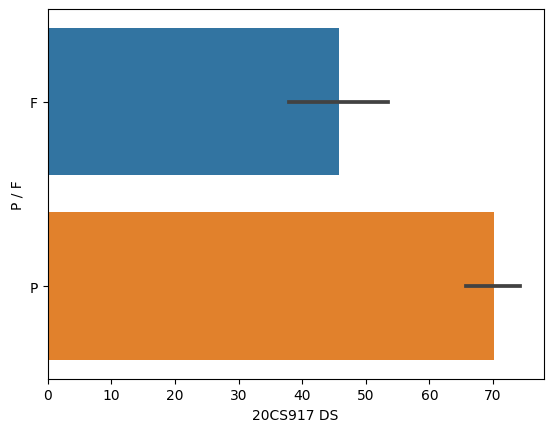

In [8]:
sns.barplot(x='20CS917 DS',y='P / F',data=data)

<AxesSubplot: xlabel='20CS917 DS', ylabel='M/F'>

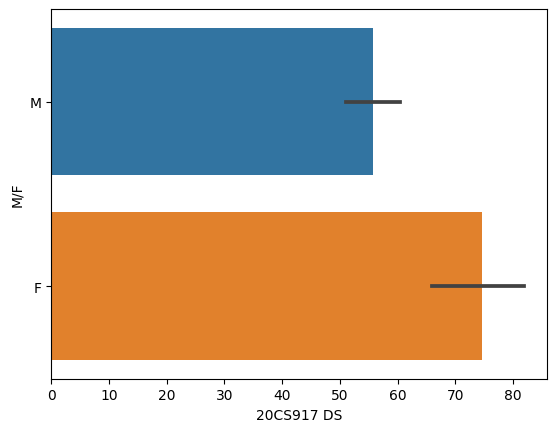

In [9]:
sns.barplot(x='20CS917 DS',y='M/F',data=data)

<AxesSubplot: xlabel='20CS917 DS', ylabel='M/F'>

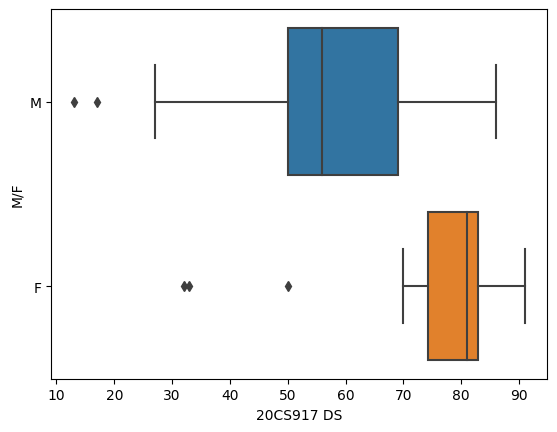

In [10]:
sns.boxplot(x='20CS917 DS',y='M/F',data=data)

<AxesSubplot: xlabel='M/F', ylabel='20CS917 DS'>

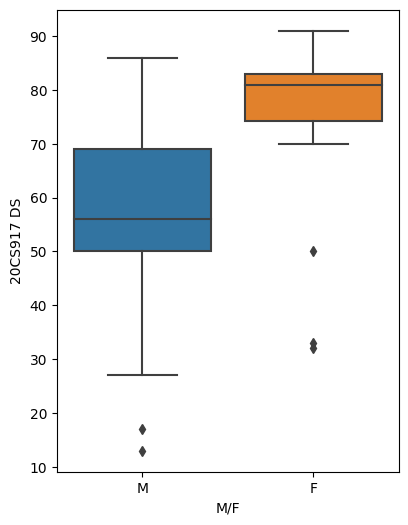

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y='20CS917 DS',x='M/F',data=data)

<AxesSubplot: xlabel='M/F', ylabel='20AI502 ML'>

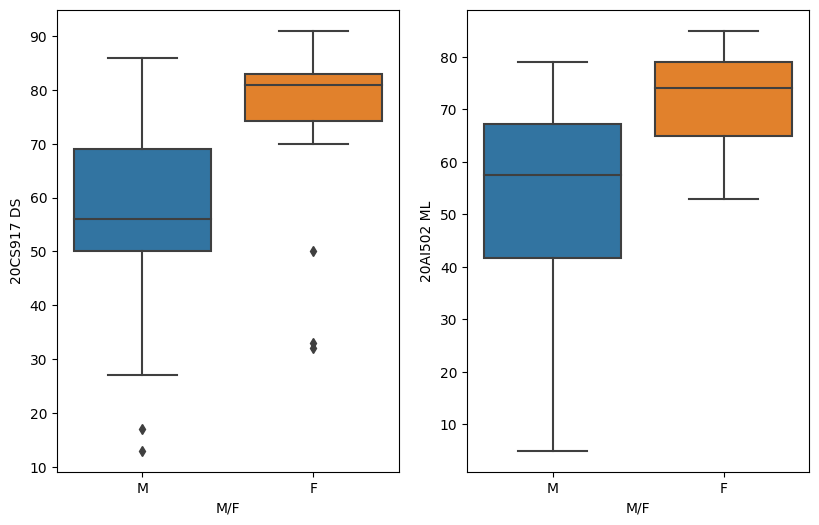

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y='20CS917 DS',x='M/F',data=data)
plt.subplot(1,3,2)
sns.boxplot(y='20AI502 ML',x='M/F',data=data)

<AxesSubplot: xlabel='TOTAL', ylabel='P / F'>

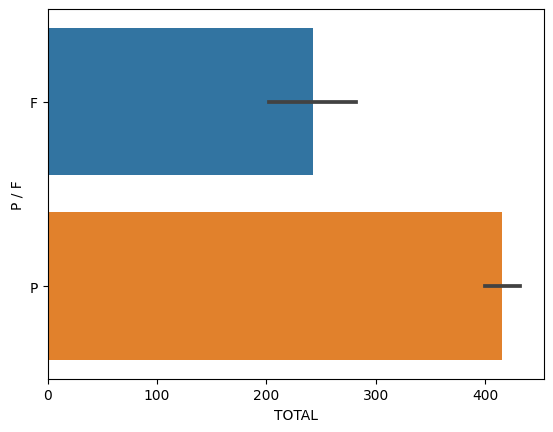

In [13]:
sns.barplot(x='TOTAL',y='P / F',data=data)

In [14]:
def grade(mark):
    if mark>90:
        return 'O'
    elif mark>80:
        return 'A+'
    elif mark>70:
        return 'A'
    elif mark>60:
        return 'B+'
    elif mark>50:
        return 'B'
    else:
        return 'F'   

In [15]:
data['Grade']=data['20CS917 DS'].apply(grade)

In [16]:
data['Grade']

0      F
1      F
2      F
3     A+
4      F
      ..
60     F
61     F
62     A
63     F
64    A+
Name: Grade, Length: 65, dtype: object

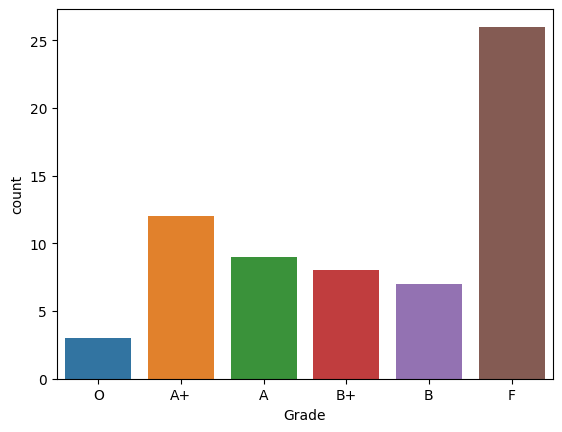

In [17]:
sns.countplot(x='Grade',data=data,order=['O','A+','A','B+','B','F'])
plt.show()

In [18]:
#Find minimum grades in any two subjects
min_ds=data['20CS917 DS']=='F'
min_ml=data['20AI502 ML']=='F'
min_cd=data['20CS601 CD']=='F'


In [19]:
min_grade = data[(min_ds)&(min_ml)&(min_cd)]
print(len(min_grade))

0
